In [ ]:
import math
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Optional - RUN THIS ONCE A DAY TO GET THE LATEST DATA. Takes a while to run.
closingPrices = pd.read_csv("latestClose.csv")
closingPrices.tail()

tickers = closingPrices.columns.to_list()[1::]
def getSearchRange(start, end):
    return closingPrices[closingPrices['Date'].between(start, end)]

In [38]:
# Calculate the daily percent returns for each stock
daily_returns = closingPrices.iloc[:, 1:].pct_change()

# Calculate the absolute daily returns
absolute_daily_returns = daily_returns.abs()

# Calculate the 14-day average of these absolute returns (our measure of average magnitude of change)
average_magnitude_change = absolute_daily_returns.rolling(window=100).mean()

average_magnitude_change.tail()

,A,AA,AAL,AAN,AAON,AAP,AAPL,AAT,AAWW,AB,...,ZNH,ZNTL,ZS,ZTO,ZTS,ZUMZ,ZUO,ZWS,ZYME,ZYXI
587,0.012549,0.026252,0.019744,0.022907,0.015451,0.012255,0.012441,0.016285,0.001497,0.016619,...,NaN,0.027359,0.024292,0.011521,0.011705,0.021009,0.024392,0.018010,0.027335,0.027664
588,0.012379,0.026301,0.019959,0.023184,0.016103,0.012501,0.012876,0.016407,0.001487,0.016632,...,NaN,0.027353,0.024294,0.011623,0.012121,0.020876,0.024662,0.018077,0.026989,0.027092
589,0.012288,0.026324,0.019818,0.022783,0.016597,0.012659,0.012716,0.016364,0.001465,0.016737,...,NaN,0.027263,0.026014,0.011794,0.012160,0.020872,0.024304,0.017941,0.026070,0.026984
590,0.012523,0.026330,0.019373,0.022805,0.016614,0.012660,0.012748,0.016239,0.001450,0.016716,...,NaN,0.027688,0.026003,0.011528,0.012049,0.021038,0.024129,0.017893,0.027048,0.027023
591,0.012398,0.026286,0.019381,0.022748,0.016646,0.012530,0.012697,0.016213,0.001449,0.016934,...,NaN,0.028375,0.026565,0.011605,0.011885,0.021002,0.024335,0.017602,0.026852,0.026603


In [ ]:
# Calculate the 63-day high for each stock
price_high = closingPrices.iloc[:, 1:].rolling(window=63).max()

# Display the last few rows of the price_high DataFrame
price_high.tail()


In [39]:
from datetime import datetime

def num_stocks_near_high(date_str):
    """
    Calculate the number of stocks that are within 2 times the 14-day average magnitude of change 
    of their 63-day high on a given date.
    
    Parameters:
    date_str (str): The date to calculate for, as a string in 'yyyy-mm-dd' format.
    
    Returns:
    int: The number of stocks within 2 times the 14-day average magnitude of change of their 63-day high.
    """
    # Convert the date string to a datetime object and format it to match the DataFrame
    date = datetime.strptime(date_str, '%Y-%m-%d').strftime('%Y-%m-%d 00:00:00-05:00')
    
    # Get the closing prices, average magnitude of change, and 63-day high for all stocks on the given date
    closing_prices = closingPrices.set_index('Date').loc[date]
    average_changes = average_magnitude_change.set_index(closingPrices['Date']).loc[date]
    highs = price_high.set_index(closingPrices['Date']).loc[date]
    
    # Calculate the difference between each stock's closing price and its 63-day high, as a percentage
    differences = (highs - closing_prices) / highs
    
    # Calculate the number of stocks that are within 2 times their average magnitude of change of their high
    num_stocks = (differences <= 2 * average_changes).sum()
    
    return num_stocks



In [43]:
# Define the start and end dates
start_date = datetime.strptime('2022-01-01', '%Y-%m-%d')
end_date = datetime.strptime('2023-05-10', '%Y-%m-%d')  # Today's date

# Create a date range from the start to the end date
date_range = pd.date_range(start_date, end_date)

# Initialize a dictionary to store the results
results = {}

# Calculate the number of stocks near their high for each date in the date range
for date in date_range:
    date_str = date.strftime('%Y-%m-%d')
    try:
        results[date_str] = num_stocks_near_high(date_str)
    except KeyError:
        # If the date is not in the dataset (e.g. it's a weekend or holiday), skip it
        continue

# Convert the results to a DataFrame
results_df = pd.DataFrame(list(results.items()), columns=['Date', 'Number of Stocks'])

# Convert the 'Date' column to datetime format
results_df['Date'] = pd.to_datetime(results_df['Date'])

# Set the 'Date' column as the index
results_df.set_index('Date', inplace=True)



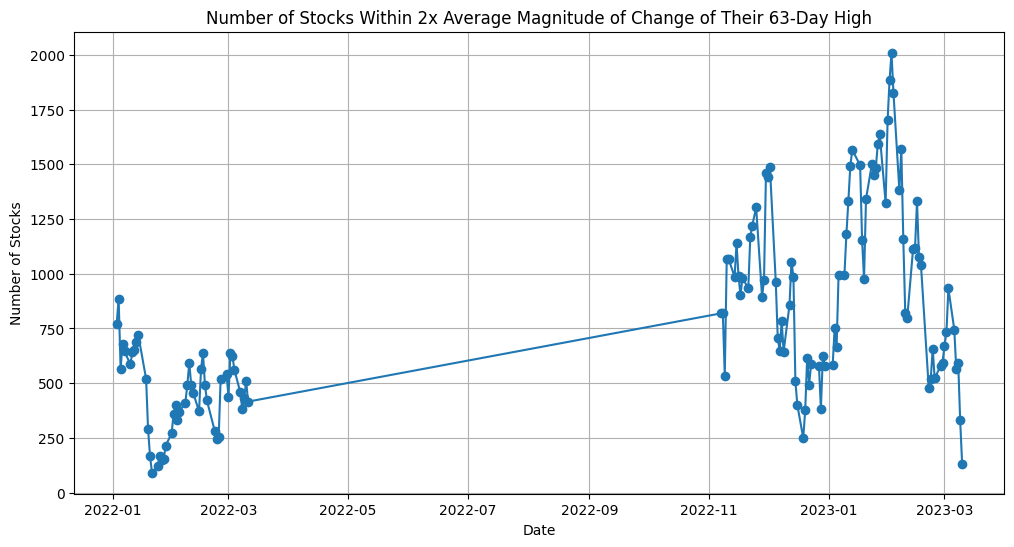

In [44]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(results_df, marker='o', linestyle='-')
plt.title('Number of Stocks Within 2x Average Magnitude of Change of Their 63-Day High')
plt.xlabel('Date')
plt.ylabel('Number of Stocks')
plt.grid(True)
plt.show()

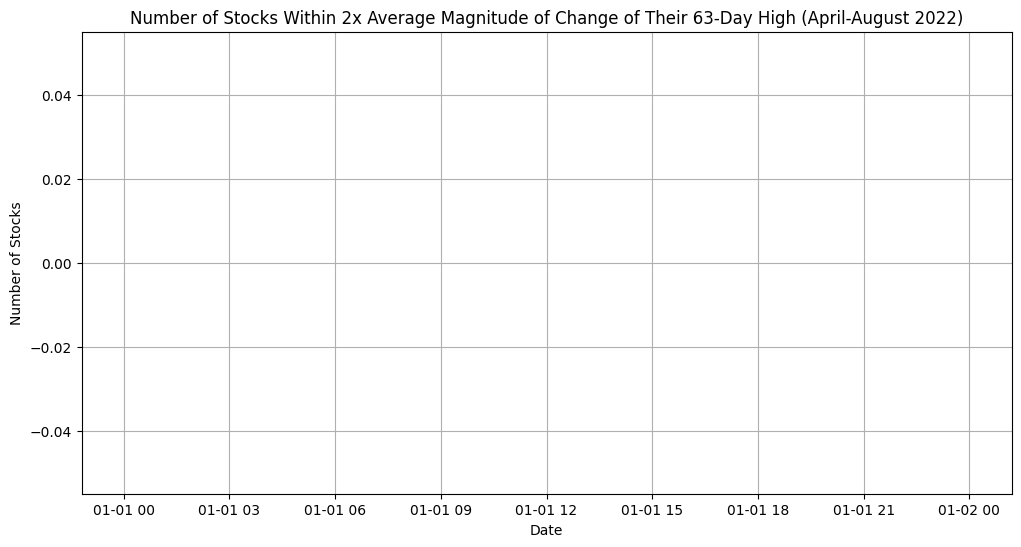

,Number of Stocks
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [45]:
# Let's inspect the data more closely for the period from April to August 2022
inspect_period = results_df[(results_df.index >= '2022-04-01') & (results_df.index <= '2022-08-31')]

# Plot the data for this period
plt.figure(figsize=(12, 6))
plt.plot(inspect_period, marker='o', linestyle='-')
plt.title('Number of Stocks Within 2x Average Magnitude of Change of Their 63-Day High (April-August 2022)')
plt.xlabel('Date')
plt.ylabel('Number of Stocks')
plt.grid(True)
plt.show()

# Show some statistics
inspect_period.describe()